In [7]:
import sys
sys.path.append("../scripts/")

import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

import numpy as np

from read_data import fromcsv2df, distribution

In [14]:
def get_histogram(feature_name, h_min, h_max,
                 stack_list, weights_list, names, signal_values, signal_weights, signal_name, dens=False):
    
    fig = plt.figure(figsize=(10, 10))
    grid = plt.GridSpec(5, 2, hspace=0.25)
    his = fig.add_subplot(grid[:-1, :])
    
    plt.title("{}".format(feature_name))   
    plt.grid()
    
    
    n_signal, bin_edges_signal,patches_signal = plt.hist(signal_values, range=(hmin,hmax), 
             weights = signal_weights, bins=30,label=signal_name,fill=False,color="red", density=dens)
    #bin_centres = (bin_edges_back[:-1] + bin_edges_back[1:])/2.
    
    n_back, bin_edges_back, patches_back = plt.hist(stack_list, range=(hmin,hmax), 
                                                    weights = weights_list, bins=30,
             stacked=True,histtype =  'barstacked',label=names, density=dens)
    
    back_array = np.array(n_back)
    
    sum_back_per_bin = back_array.sum(axis=0)
    
    
    
    

    print("BACK", sum_back_per_bin)
   
    
    plt.legend(loc="upper right")
    plt.ylabel('Events')
    
    
    mask_0_back = sum_back_per_bin != 0
    


    if dens:
        if not os.path.exists('../histograms/density_true/'):
            os.makedirs('../histograms/density_true/')
        plotname = "../histograms/density_true/" + signal_name+ "_" +feature_name +".png"
    else:
        if not os.path.exists('../histograms/density_false/'):
            os.makedirs('../histograms/density_false/')
        plotname = "../histograms/density_false/" + signal_name+ "_" +feature_name +".png"
    plt.savefig(plotname)  
    plt.show()

In [15]:
def get_stacks(d,feature):
    stack_list = []
    weights_list = []
    names = []
    for samp, number in d.items():
        df_per_samp = df0[df0["sample"] == samp] #dataframe containing 
                                                 #only one kind of sample
        print(samp, number, df_per_samp["weight_column"].values.sum())
        stack_list.append(df_per_samp[feature].values)
        weights_list.append(df_per_samp["weight_column"].values)
        names.append(samp)
    return stack_list, weights_list, names

all_signal_m800_np_bg.csv m800_np
Index(['mumuSS', 'mumuOS', 'emu', 'ee', 'mll', 'drll', 'drjl1', 'drjl2',
       'drlmet', 'dphi_ll', 'dphi_llmet', 'dphi_fj12', 'dphi_fj13',
       'dphi_fj23', 'met', 'mt', 'mt2t', 'bveto', 'hthad_rj', 'hthad_fj',
       'htlep', 'fj1mass', 'fj2mass', 'fj1pt', 'fj2pt', 'nel', 'nmu', 'nj',
       'nfj', 'nfj_w', 'label', 'weight_column', 'sample'],
      dtype='object')
features ['bveto', 'mt2t', 'nfj_w', 'hthad_fj', 'mt', 'met', 'htlep']
::: bveto
df_signal.shape (16110, 3)
ttbar dileptonic 140040 124460.55
drell-yan 110904 88263.15685495628
ww+2j 24387 24648.67392354403
wz+2j 9324 8189.761994710995
ttbarZ 3659 2479.7042999999994
ttbarW 1308 641.0246399999999
wwz 879 219.50387999999998
www 758 256.2797999999999
wzz 359 28.91745
zz+1j 219 163.51410872097975
zzz 166 4.341137142857143
BACK [1111458.95616698       0.               0.               0.
       0.               0.               0.               0.
       0.               0.               0.  

NameError: name 'os' is not defined

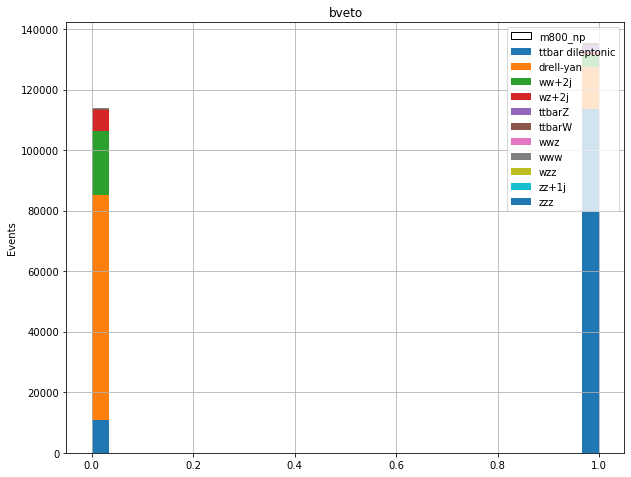

In [16]:
source_path = "../processed_data/"

for file in glob(source_path + "all_signal*"):
    signal_file = file.split("/")[-1] 
    signal = signal_file.split("_")[2] + "_" + signal_file.split("_")[3]  #   "m1000_np"
    print(signal_file, signal)
    
    df0 = fromcsv2df(source_path + signal_file)
    print(df0.columns)
    df = df0[['bveto', 'mt2t','nfj_w','hthad_fj','mt', 'met', 'htlep','label','weight_column', "sample" ]]
    # data and label matrices


    features = list(df.columns)

    features.remove('label')
    features.remove('weight_column')
    features.remove("sample")
    print("features", features)
    
    for feature in features:
        print(":::",feature)
        df0 = df[['sample',feature,"weight_column"]] # taking only three columns
        df_signal = df0[df0["sample"]==signal] # taking only signal
        signal_weights = df_signal["weight_column"].values
        df0 = df0[df0["sample"]!=signal] #taking only background
        hmin=df0[feature].values.min()
        hmax=df0[feature].values.max()

        print("df_signal.shape", df_signal.shape)
        d = df0["sample"].value_counts()

        stack_list, weights_list, names = get_stacks(d,feature)

        get_histogram( feature, hmin, hmax, stack_list, weights_list, names,
                      df_signal[feature].values,signal_weights, signal, dens=False)